# Bibliotecas

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer


# Feature Engineering

In [27]:
import pandas as pd
import numpy as np 
data= pd.read_csv("../data/processed/data_processed.csv", index_col="Unnamed: 0")
data

,date,r_fighter,b_fighter,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,time
0,2024-03-23 00:00:00,Rose Namajunas,Amanda Ribas,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,1,1,1,25.0
1,2024-03-23 00:00:00,Karl Williams,Justin Tafa,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,4,1,1,15.0
2,2024-03-23 00:00:00,Edmen Shahbazyan,AJ Dobson,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,3,2,1,4.0
3,2024-03-23 00:00:00,Payton Talbott,Cameron Saaiman,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,1,2,1,5.0
4,2024-03-23 00:00:00,Youssef Zalal,Billy Quarantillo,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,2,3,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,1994-03-11 00:00:00,Royce Gracie,Minoki Ichihara,0.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,4,3,2,5.0
7492,1994-03-11 00:00:00,Orlando Wiet,Robert Lucarelli,0.0,0.0,8.0,2.0,0.0,1.0,0.0,1.0,4,2,1,2.0
7493,1994-03-11 00:00:00,Frank Hamaker,Thaddeus Luster,0.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,4,3,3,4.0
7495,1994-03-11 00:00:00,Patrick Smith,Ray Wizard,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4,3,2,0.0


In [72]:
prueba= pd.read_csv("../data/test/ejemplo.csv", index_col="Unnamed: 0")
prueba = prueba.drop(columns = ["r_fighter","b_fighter"])
prueba

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class
0,0.0,0.0,43.75,37.0,0.0,0.25,0.0,0.5,2


In [15]:
list(prueba.columns)

['r_fighter',
 'b_fighter',
 'r_kd',
 'b_kd',
 'r_str',
 'b_str',
 'r_td',
 'b_td',
 'r_sub',
 'b_sub',
 'weight_class']

In [29]:
data.columns

Index(['date', 'r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_str', 'b_str',
       'r_td', 'b_td', 'r_sub', 'b_sub', 'weight_class', 'method',
       'method_detailed', 'time'],
      dtype='object')

<Axes: >

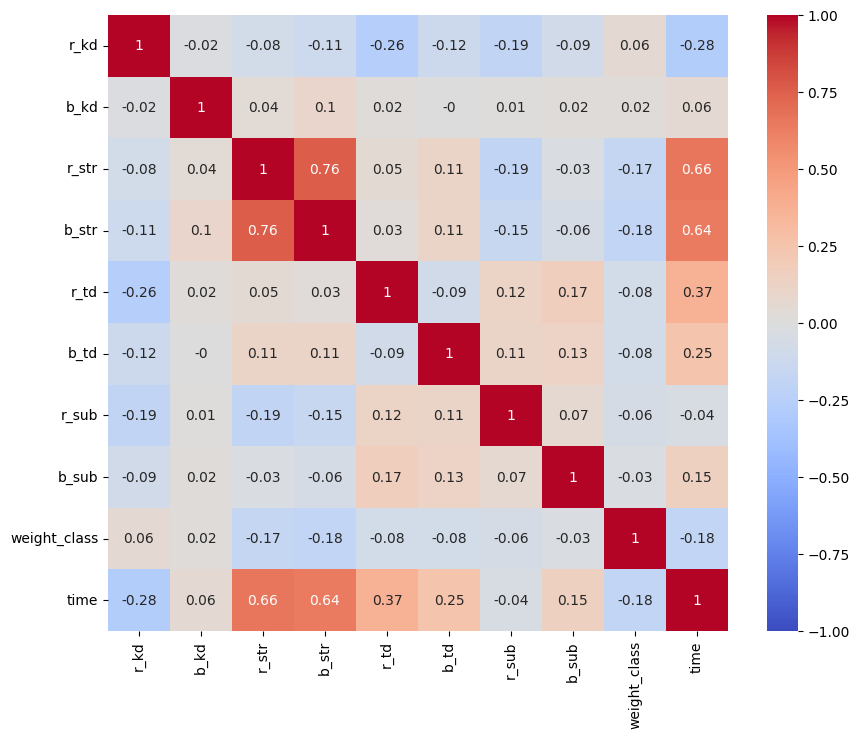

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=["date","r_fighter","b_fighter","method","method_detailed"]).corr().round(2), 
            annot=True,          
            cmap="coolwarm",     
            vmin=-1,
            vmax=1) 

# Dividir en Train y Test

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

In [34]:
train, test = train_test_split(data, random_state=42, test_size=0.2)

train = train.drop(columns=["date","r_fighter","b_fighter","method","method_detailed"])
test = test.drop(columns=["date","r_fighter","b_fighter","method","method_detailed","time"])

train.to_csv("../data/train/train.csv")
test.to_csv("../data/test/test.csv")

print(train.shape)
print(test.shape)

(5903, 10)
(1476, 9)


# Modelos

### Modelo 1: Regresión Lineal

Biblotecas

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Modelo

In [37]:
X = train.drop(columns=["time"])
y = train[["time"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4722, 9)
(1181, 9)
(4722, 1)
(1181, 1)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 2.959110485143614


Visualizacion

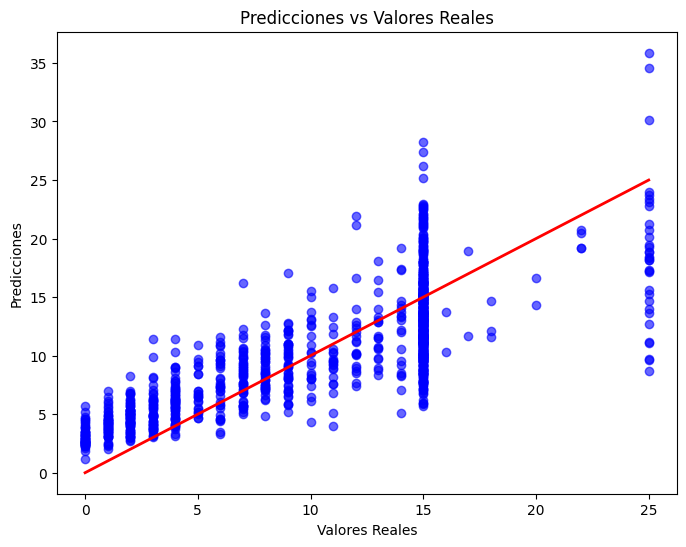

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

Prediccion test

In [56]:
test_1 = test.copy()

In [ ]:
test_predictions = model.predict(test_1)

In [66]:
test_1["time"] = test_predictions
test_1.head()

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,time
1112,0.0,0.0,155.0,148.0,3.0,0.0,0.0,2.0,2,29.283136
2362,0.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0,3,4.172903
7253,0.0,0.0,17.0,12.0,2.0,0.0,2.0,0.0,4,6.877334
4051,0.0,0.0,8.0,5.0,2.0,2.0,1.0,0.0,2,7.962641
2708,1.0,0.0,14.0,12.0,0.0,0.0,0.0,0.0,2,4.045232


Prueba

In [73]:
prueba

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class
0,0.0,0.0,43.75,37.0,0.0,0.25,0.0,0.5,2


In [100]:
model.predict(prueba)


array([[9.56074146]])

### Modelo 2: Decision Tree Regressor

In [62]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [63]:
# Evaluación del modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")


Mean Absolute Error (MAE): 2.3975063976222164
Mean Squared Error (MSE): 11.911184540457619


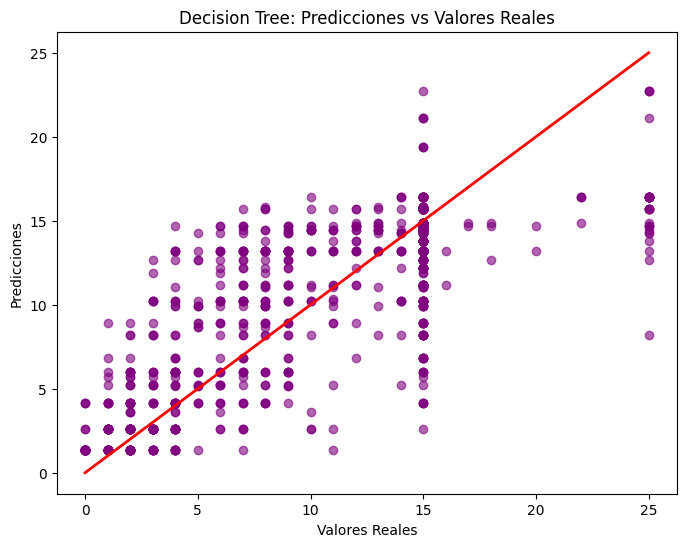

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Decision Tree: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


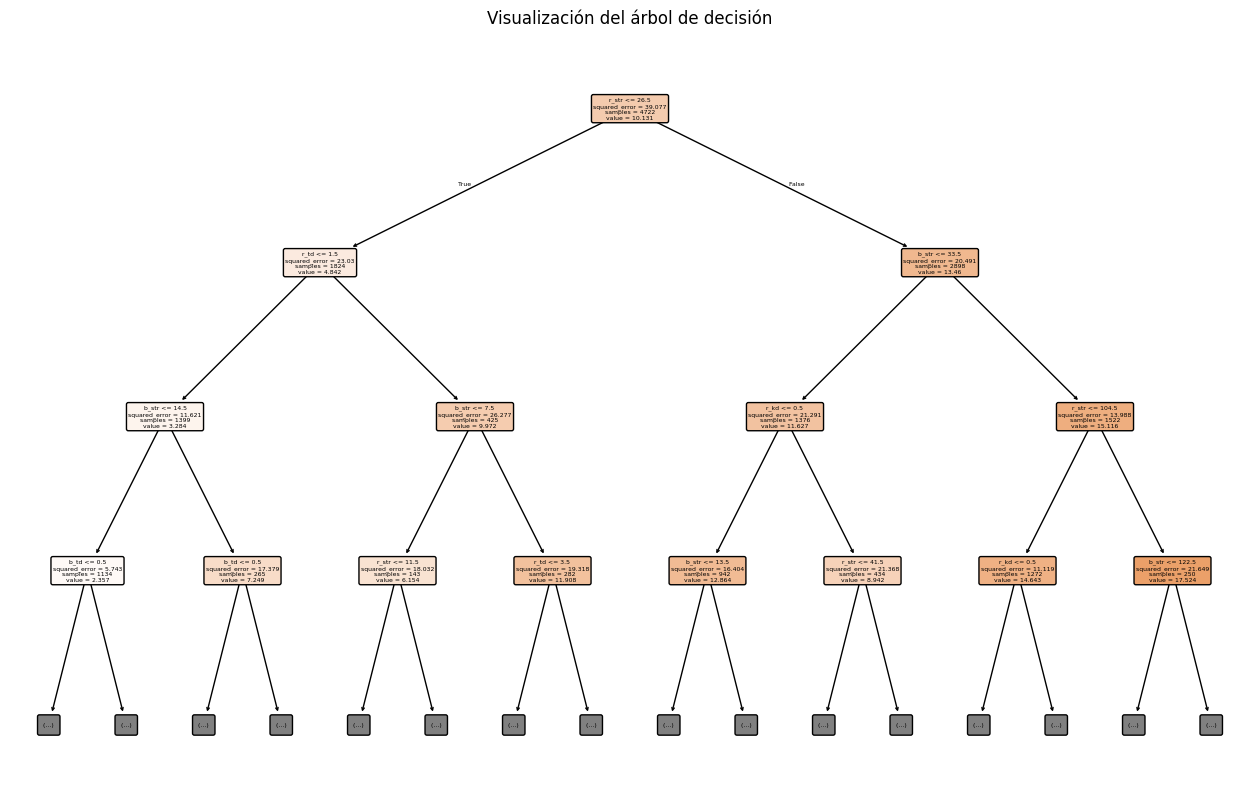

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Visualización del árbol de decisión")
plt.show()


test

In [77]:
test_2 = test.copy()

In [97]:
test_predictions = dt_model.predict(test_2)
test_2["time"] = test_predictions

In [98]:
test_2

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,time
1112,0.0,0.0,155.0,148.0,3.0,0.0,0.0,2.0,2,22.700000
2362,0.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0,3,2.574648
7253,0.0,0.0,17.0,12.0,2.0,0.0,2.0,0.0,4,8.920000
4051,0.0,0.0,8.0,5.0,2.0,2.0,1.0,0.0,2,3.613636
2708,1.0,0.0,14.0,12.0,0.0,0.0,0.0,0.0,2,2.574648
...,...,...,...,...,...,...,...,...,...,...
4432,0.0,0.0,19.0,4.0,5.0,0.0,4.0,0.0,1,6.821918
6916,0.0,0.0,44.0,4.0,0.0,3.0,1.0,0.0,3,8.221154
6919,1.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,3,1.356239
2312,0.0,1.0,41.0,24.0,2.0,0.0,0.0,0.0,2,13.177866


prueba

In [101]:
dt_model.predict(prueba)

array([14.68372093])

### Modelo 3: Random Forest Regressor

In [107]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [108]:
# Evaluación del modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")


Mean Absolute Error (MAE): 2.1747709632309546
Mean Squared Error (MSE): 10.091912067532077


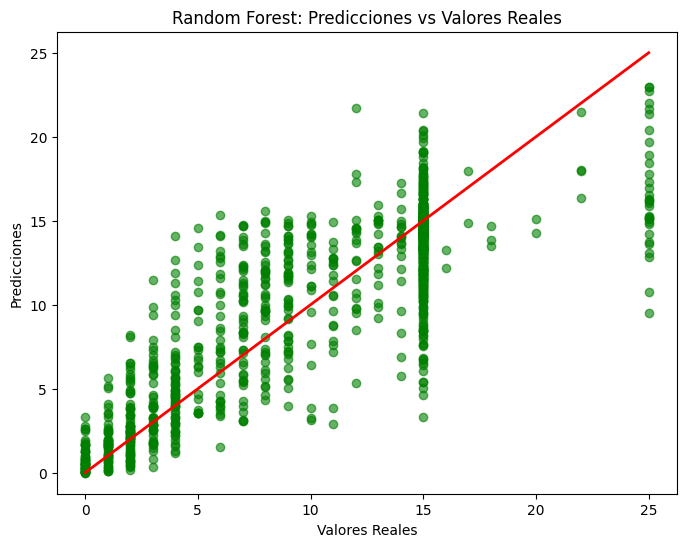

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


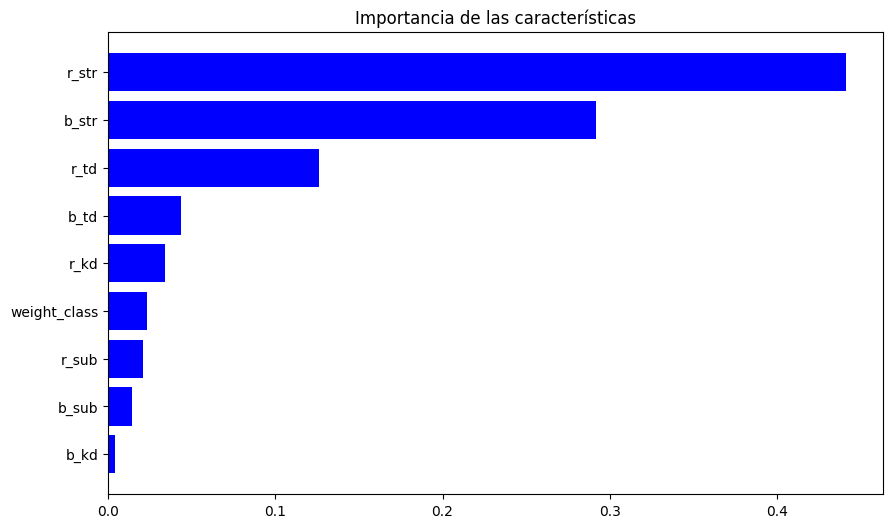

In [110]:
# Importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='blue')
plt.title('Importancia de las características')
plt.gca().invert_yaxis()
plt.show()


tuneado

In [111]:
rf_tuned = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Reevaluar el modelo ajustado
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
print(f"Tuned MAE: {mae_rf_tuned}")


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tuned MAE: 2.073488315513101


test

In [112]:
test_3 = test.copy()

In [113]:
rf_tuned.predict(test_3)

array([22.62957052,  1.5962926 ,  7.03047094, ...,  1.28851787,
       13.66562066, 11.76715672])

prueba

In [114]:
rf_tuned.predict(prueba)

array([14.59106404])

### Modelo 4: XGBoost

In [126]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [127]:
# Evaluar el desempeño del modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")


Mean Absolute Error (MAE): 2.078154889634865
Mean Squared Error (MSE): 9.36316358674124


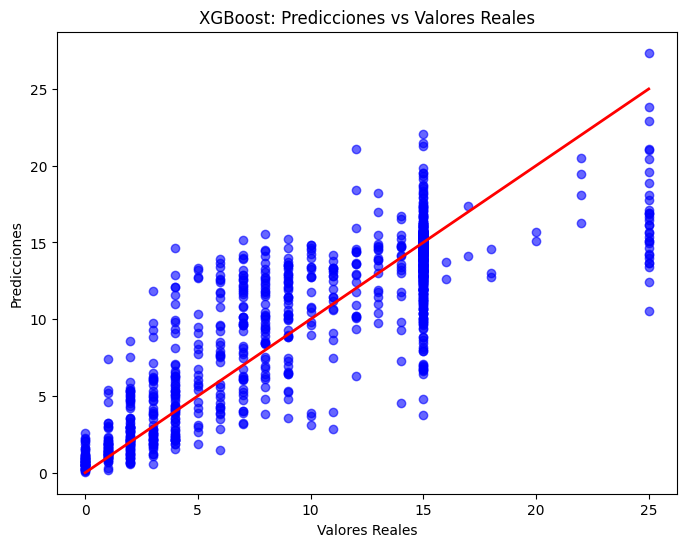

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


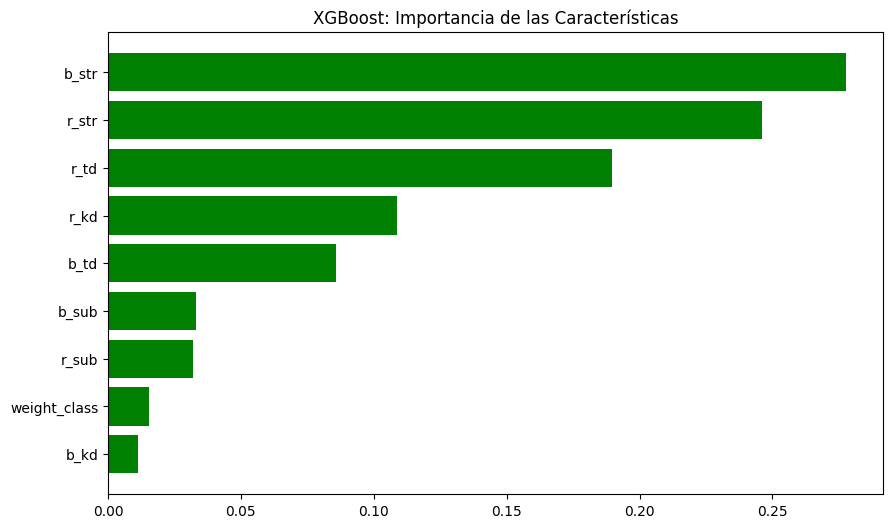

In [129]:
# Importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='green')
plt.title('XGBoost: Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()


In [130]:
xgb_tuned = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Reevaluar el modelo ajustado
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
print(f"Tuned MAE: {mae_xgb_tuned}")


Tuned MAE: 2.0818582262203513


test

In [132]:
test_4 = test.copy()
xgb_tuned.predict(test_4)

array([21.895086 ,  2.3282838,  7.2671647, ...,  1.0917443, 12.970401 ,
       11.684392 ], dtype=float32)

prueba

In [133]:
xgb_tuned.predict(prueba)

array([13.884951], dtype=float32)

### Modelo 5: Red Neuronal

In [150]:
# Definir la arquitectura de la red
model_red = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Capa oculta 1
    Dropout(0.2),                                              # Regularización
    Dense(64, activation='relu'),                              # Capa oculta 2
    Dropout(0.2),
    Dense(1)                                                   # Capa de salida para regresión
])

# Compilar el modelo
model_red.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
# Entrenar el modelo
history = model_red.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1)


Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 68.1582 - mae: 5.7860 - val_loss: 20.3608 - val_mae: 3.4167
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8172 - mae: 3.6641 - val_loss: 15.5530 - val_mae: 2.9700
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4099 - mae: 3.2431 - val_loss: 15.3555 - val_mae: 2.8729
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.0389 - mae: 3.0898 - val_loss: 13.3409 - val_mae: 2.7009
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.1395 - mae: 2.9883 - val_loss: 16.7528 - val_mae: 3.0437
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.0019 - mae: 2.9847 - val_loss: 14.3773 - val_mae: 2.8642
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.9122 - mae: 2.9156 - val_loss: 12.5926 - val_mae: 2.5880
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4072 - mae: 2.8739 - val_loss: 16.0144 - val_mae: 2.9901
Epoch 9/100
119/119 ━━━━━━━━━━━━

In [152]:
# Predicciones en el conjunto de prueba
y_pred_ann = model.predict(X_test).flatten()

# Evaluación
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)

print(f"Mean Absolute Error (MAE): {mae_ann}")
print(f"Mean Squared Error (MSE): {mse_ann}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 2.1258509110637283
Mean Squared Error (MSE): 9.49746583956271


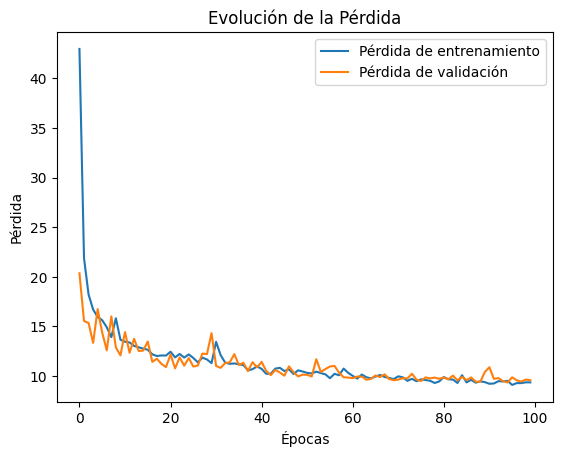

In [153]:
import matplotlib.pyplot as plt

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


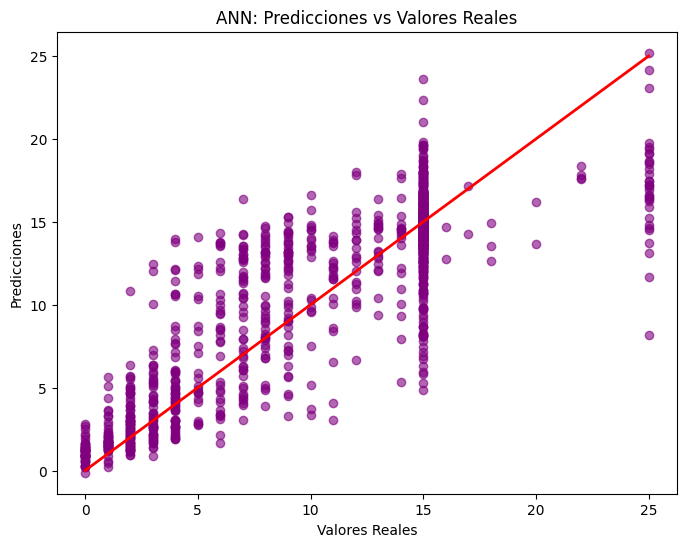

In [154]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('ANN: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


test

In [155]:
model_red.predict(test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[19.263687  ],
       [ 1.9275125 ],
       [ 6.821225  ],
       ...,
       [ 0.78928435],
       [12.440215  ],
       [11.483708  ]], dtype=float32)

prueba

In [156]:
model_red.predict(prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[13.461276]], dtype=float32)

## Modelos No supervisados

### Modelo 6: Kmeans

In [160]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [161]:
metrics_media = pd.read_csv("../data/processed/metrics_media.csv")

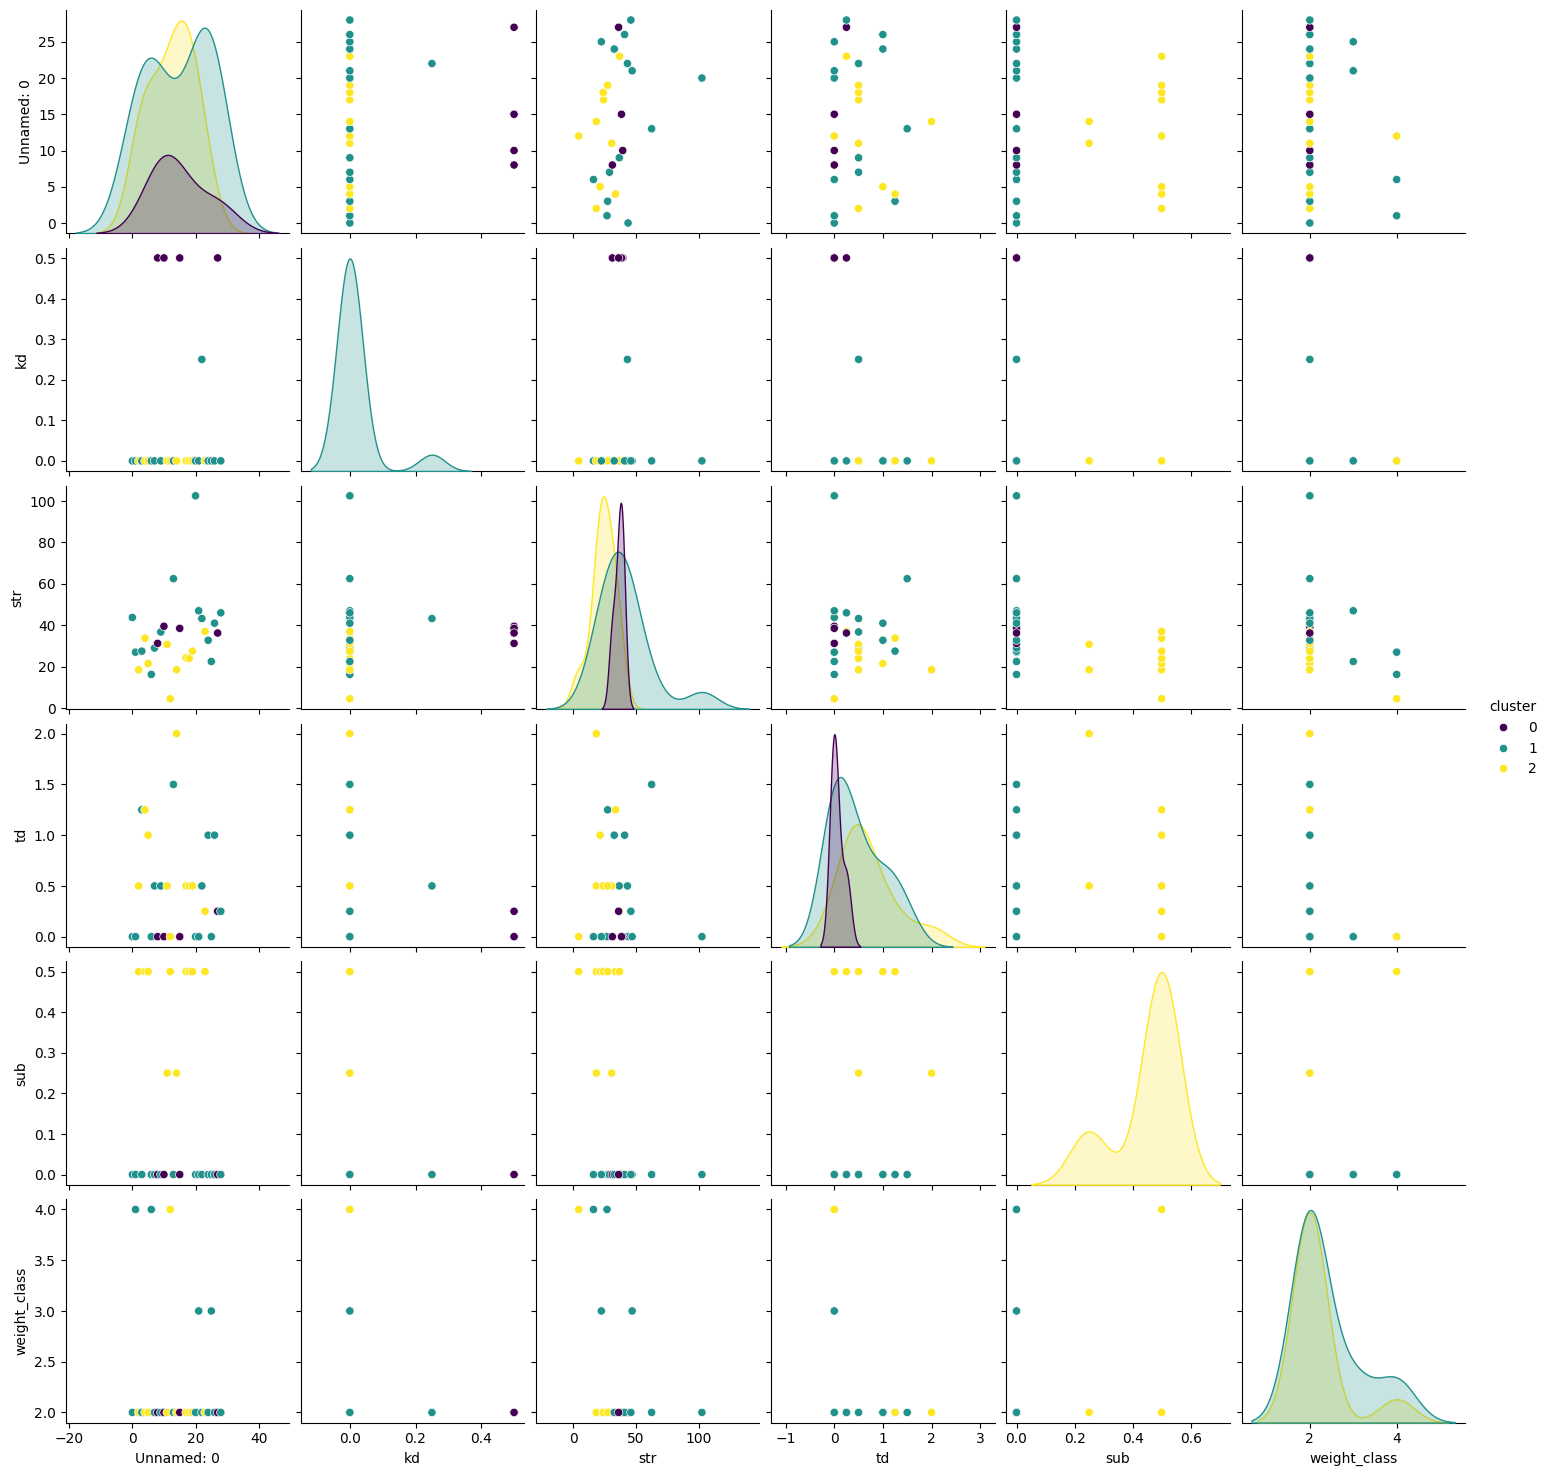

In [162]:

# Estandarizar las métricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(metrics_media[['kd', 'str', 'td', 'sub']])

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Agregar los clústeres al dataframe
metrics_media['cluster'] = kmeans.labels_

# Visualización de los clústeres
sns.pairplot(metrics_media, hue='cluster', diag_kind='kde', palette='viridis')
plt.show()


### Modelo 7: PCA

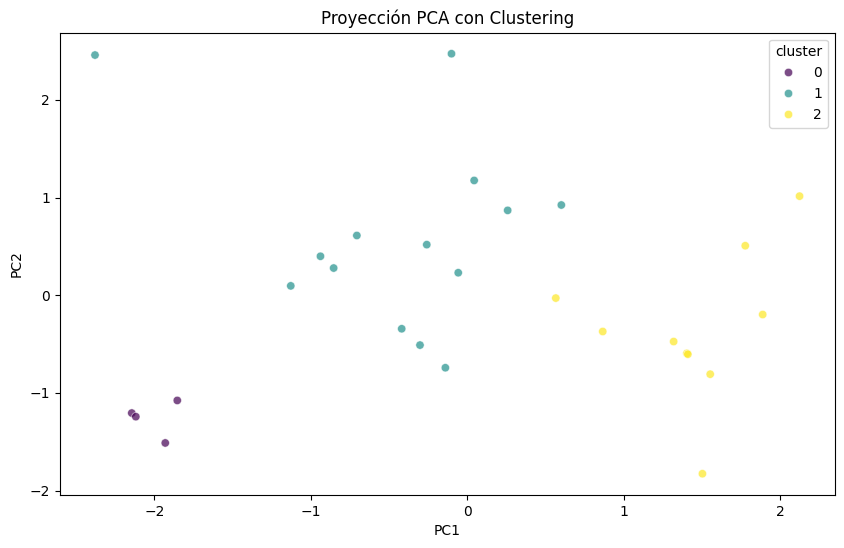

In [163]:
from sklearn.decomposition import PCA

# Reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un dataframe con las componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans.labels_

# Visualizar los datos en el espacio reducido
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Proyección PCA con Clustering')
plt.show()


###

### Modelo 8: GradientBoostingRegressor

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar el modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predicciones
y_pred = gbr.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE Gradient Boosting: {mae}")


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MAE Gradient Boosting: 2.143762310097538


In [165]:
gbr.predict(test)

array([22.99920275,  1.4648098 ,  7.7605438 , ...,  1.29725448,
       13.0312372 , 12.25475529])

In [166]:
gbr.predict(prueba)

array([13.07363832])

### Modelo 9: LightGBM

In [169]:
from lightgbm import LGBMRegressor

# Entrenar el modelo LightGBM
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

# Predicciones
y_pred = lgbm.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE LightGBM: {mae}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 4722, number of used features: 9
[LightGBM] [Info] Start training from score 10,130877
MAE LightGBM: 2.114942660551314


In [206]:
import pickle

In [ ]:
# with open('../models/ufc_model.pkl', 'wb') as model_file:
#     pickle.dump(lgbm, model_file)

In [ ]:
# with open('../models/ufc_model.pkl', 'rb') as model_file:
#     lgbm = pickle.load(model_file)

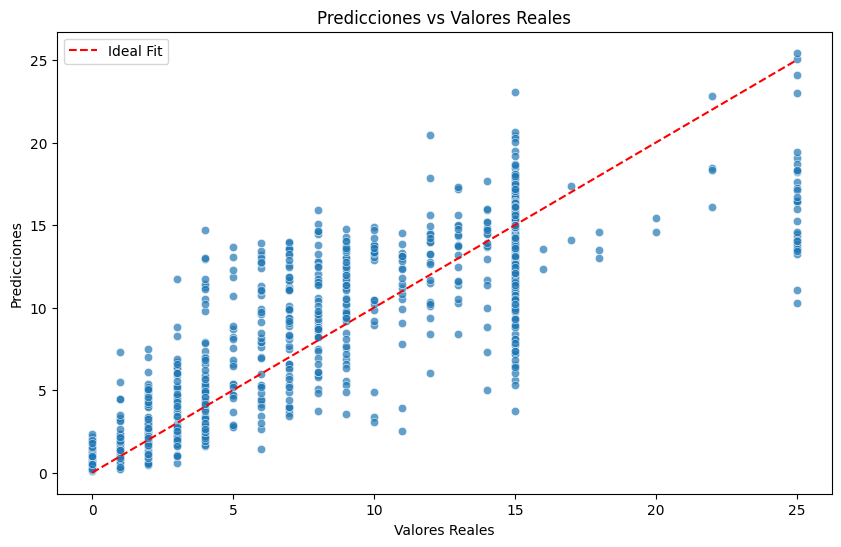

In [176]:

# Gráfico de dispersión: Valores reales vs predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel(), alpha=0.7)  # Ahora son vectores 1D
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.show()




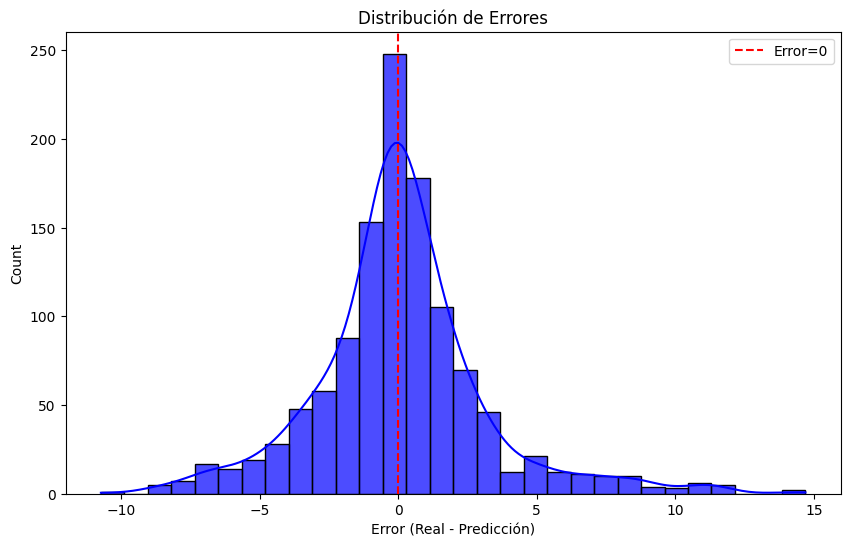

In [180]:
# Histograma de los errores
y_test_ravel = y_test.values.ravel()
y_pred_ravel = y=y_pred.ravel()
errors = y_test_ravel - y_pred_ravel
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', label='Error=0')
plt.xlabel("Error (Real - Predicción)")
plt.title("Distribución de Errores")
plt.legend()
plt.show()

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_3192\310960451.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


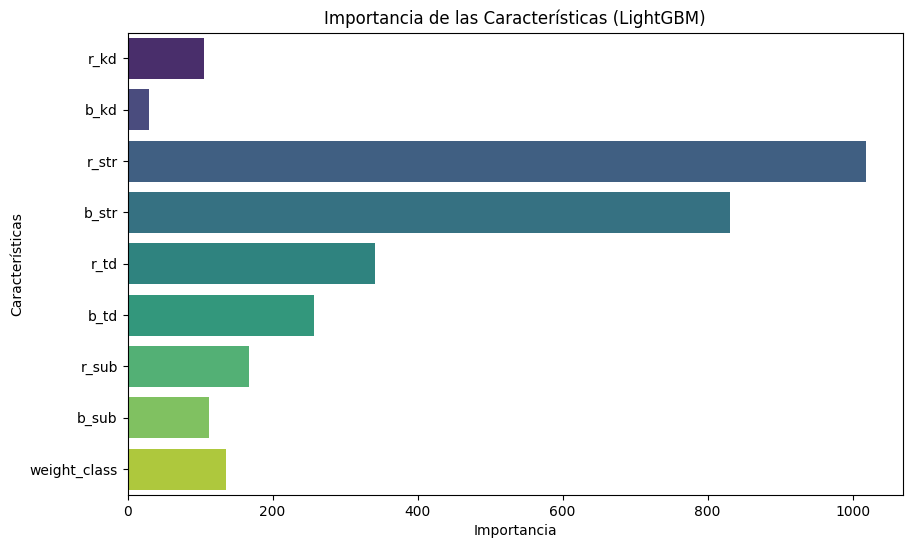

In [181]:
# Importancia de características
importances = lgbm.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las Características (LightGBM)")
plt.xlabel("Importancia")
plt.ylabel("Características")

plt.show()

test y prueba

In [183]:
print(lgbm.predict(test))

[21.71783655  1.6852869   7.20248623 ...  0.89835534 13.18957276
 12.06330573]


In [184]:
print(lgbm.predict(prueba))

[14.74766321]


### Modelo 10: SupportVectorMachine

In [191]:
from sklearn.svm import SVR

# Entrenar el modelo SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predicciones
y_pred = svr.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE SVR: {mae}")


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE SVR: 2.334964032428689


In [192]:
svr.predict(test)

array([17.54099078,  2.04527366,  5.8624209 , ...,  0.90830202,
       12.4811912 , 14.49949926])

In [193]:
svr.predict(prueba)

array([13.78202928])

prueba y test

### Modelo 11: CatBoost

In [192]:
# from catboost import CatBoostRegressor

# # Entrenar el modelo CatBoost
# catboost = CatBoostRegressor(verbose=0, random_state=42)
# catboost.fit(X_train, y_train)

# # Predicciones
# y_pred = catboost.predict(X_test)

# # Métrica de evaluación
# mae = mean_absolute_error(y_test, y_pred)
# print(f"MAE CatBoost: {mae}")


### Modelo 12: Ridge Regression

In [197]:
from sklearn.linear_model import Ridge

# Entrenar el modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predicciones
y_pred = ridge.predict(X_test)

# Métrica de evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE Ridge: {mae}")


MAE Ridge: 2.9591187556723426


test y prueba


In [198]:
ridge.predict(test)

array([[29.28284825],
       [ 4.17276145],
       [ 6.87748891],
       ...,
       [ 3.72130362],
       [10.05572579],
       [ 9.80604724]])

In [199]:
ridge.predict(prueba)

array([[9.56051272]])

# PipeLine

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [205]:

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.columns)  # Escalar características numéricas
])

# 3. Definir los modelos
models = {"LinearRegression": LinearRegression(),
            "DecisionTree": DecisionTreeRegressor(random_state=42),
            "RandomForest": RandomForestRegressor(random_state=42, n_estimators=100),
            "XGBoost": XGBRegressor(random_state=42, n_estimators=100),
            "LightGBM": LGBMRegressor(random_state=42, n_estimators=100)}

# 4. Crear y evaluar los pipelines
for name, model in models.items():
    # Crear el pipeline
    pipeline = Pipeline([('preprocessor', preprocessor),  
                        ('model', model)])
    
    # Evaluar con validación cruzada
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name}: Mean Absolute Error: {-np.mean(scores):.2f}")


LinearRegression: Mean Absolute Error: 2.89
DecisionTree: Mean Absolute Error: 2.61
RandomForest: Mean Absolute Error: 2.10
XGBoost: Mean Absolute Error: 2.20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 3777, number of used features: 9
[LightGBM] [Info] Start training from score 10,165210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 3777, number of used features: 9
[LightGBM] [Info] Start training from score 10,198570
[LightGBM] [Info] Auto-choosing r

# Prueba de pelea

In [201]:
comparaciones = pd.DataFrame({
    "LinearRegression": [model.predict(prueba).round(2)],
    "RegressionClassifier": dt_model.predict(prueba).round(2),
    "RandomForestTuned": rf_tuned.predict(prueba).round(2),
    "CGBoostTuned":xgb_tuned.predict(prueba).round(2),
    "redNeuronal":[model_red.predict(prueba).round(2)],
    "GradientBoostingRegressor": gbr.predict(prueba).round(2),
    "LigghtGBM": lgbm.predict(prueba).round(2),
    "SupportVectorMachine": svr.predict(prueba).round(2),
    "RidgeRegressor": [ridge.predict(prueba).round(2)]})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [202]:
comparaciones

,LinearRegression,RegressionClassifier,RandomForestTuned,CGBoostTuned,redNeuronal,GradientBoostingRegressor,LigghtGBM,SupportVectorMachine,RidgeRegressor
0,[[14.34]],14.68,14.59,13.88,[[13.46]],13.07,14.75,13.78,[[9.56]]
